In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [42]:
df = pd.read_excel(f'./../data/country_data/zambia/DataRequest_Vehicle Fleet_17.04.23.xlsx', sheet_name='Motor_Vehicle_Registration_Data')
df

,ID No.,Make,Model,Category,GVM,Engine Capacity,Seating Capacity,Year of Manufacture,Year of Registration,Year of Fitness,Date of Registrations,Fitness Expiry
0,1,Toyota,HARRIER,Light passenger vehicle,2000.0,2200.0,5.0,1999.0,2015,2020.0,2015-01-05,2020-06-11 00:00:00
1,2,Mazda,TITAN,Light load vehicle (GVM 3500Kg or less),2000.0,2000.0,3.0,1997.0,2015,2022.0,2015-01-05,2022-05-18 00:00:00
2,3,Toyota,Corolla,Light passenger vehicle,1375.0,1490.0,5.0,1997.0,2015,2023.0,2015-01-05,2023-05-18 00:00:00
3,4,BMW,3 Series,Light passenger vehicle,1740.0,1890.0,5.0,2000.0,2015,2021.0,2015-01-05,2021-03-03 00:00:00
4,5,Scania,RIGID TRUCK,Heavy load veh(GVM > 3500Kg),18000.0,9500.0,2.0,1998.0,2015,2024.0,2015-01-05,2024-03-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
374374,374375,Mitsubishi,Canter,Light passenger vehicle,2450.0,4210.0,3.0,2000.0,2015,2017.0,2015-08-28,2017-09-29 00:00:00
374375,374376,Ducati,Super Sport,Motorcycle (less than 3 wheels),450.0,800.0,2.0,2009.0,2016,2017.0,2016-03-22,2017-04-05 00:00:00
374376,374377,Toyota,SPRINTER,Light passenger vehicle,1375.0,1500.0,5.0,1997.0,2015,2016.0,2015-09-09,2016-09-27 00:00:00
374377,374378,Mitsubishi,Canter,Light passenger vehicle,2500.0,2700.0,3.0,1989.0,2015,2017.0,2015-05-12,2017-06-21 00:00:00


In [43]:
years = df['Year of Registration '].unique().tolist()

In [58]:
# make a dictionary to match up what we want to what's in the data
cat_dict = {'Van': ['Light load vehicle (GVM 3500Kg or less)'], 
            'Truck': ['Heavy load veh(GVM > 3500Kg)'],
            'Trailer': ['Trailer'],
            'Bus': ['Heavy passenger vehicle'],
            'Agri': ['Agricultural tractor', 'Agricultural trailer', 'Agricultural trailor'],
            'Moto': ['Motorcycle (less than 3 wheels)'],
            'Tricycle': ['Motor Tricycle']
            }

In [59]:
data = {}
for year in years:
    
    year_data = {}
#    cars = len(df[(df['Year of Registration '] == year) & (df['Seating Capacity'] <= 7)])  # cars assumed 7 or fewer seats
 #   minibuses = len(df[(df['Year of Registration '] == year) & (df['Seating Capacity'] > 7)])  # minibuses assumed greater than 7 seats

    # do it again to take account of vehs imported with fewer seats
    minibus_data = df[(df['Year of Registration '] == year) & (df['Category'] == 'Light passenger vehicle') & ((df['Seating Capacity'] > 7) | (df['Model'] == 'HIACE'))]
    
    # cars are the remainder
    cars = len(df[(df['Year of Registration '] == year) & (df['Category'] == 'Light passenger vehicle') & (~df.index.isin(minibus_data.index))])
    minibuses = len(minibus_data)
    
    year_data['Car'] = cars
    year_data['Minibus'] = minibuses
    
    # now do the rest
    for cat in cat_dict:
        year_data[cat] = len(df[(df['Year of Registration '] == year) & (df['Category'].isin(cat_dict[cat]))])
    
    data[year] = year_data

data

{2015: {'Car': 35192,
  'Minibus': 3768,
  'Van': 5697,
  'Truck': 6040,
  'Trailer': 2243,
  'Bus': 650,
  'Agri': 7,
  'Moto': 2635,
  'Tricycle': 46},
 2016: {'Car': 17852,
  'Minibus': 1935,
  'Van': 4358,
  'Truck': 3854,
  'Trailer': 1585,
  'Bus': 514,
  'Agri': 4,
  'Moto': 2524,
  'Tricycle': 73},
 2017: {'Car': 22913,
  'Minibus': 2629,
  'Van': 4695,
  'Truck': 5597,
  'Trailer': 1066,
  'Bus': 727,
  'Agri': 6,
  'Moto': 1833,
  'Tricycle': 75},
 2018: {'Car': 24044,
  'Minibus': 2783,
  'Van': 4825,
  'Truck': 8189,
  'Trailer': 2074,
  'Bus': 861,
  'Agri': 1,
  'Moto': 2156,
  'Tricycle': 89},
 2019: {'Car': 21256,
  'Minibus': 2384,
  'Van': 3422,
  'Truck': 6999,
  'Trailer': 2228,
  'Bus': 836,
  'Agri': 0,
  'Moto': 2544,
  'Tricycle': 90},
 2020: {'Car': 17203,
  'Minibus': 1690,
  'Van': 2612,
  'Truck': 5615,
  'Trailer': 1651,
  'Bus': 483,
  'Agri': 0,
  'Moto': 2193,
  'Tricycle': 97},
 2021: {'Car': 25713,
  'Minibus': 2084,
  'Van': 3503,
  'Truck': 7283,
  '

In [60]:
pd.DataFrame(data).to_csv(f'./../data/country_data/zambia/zambian-import-data-processed.csv',index=True)

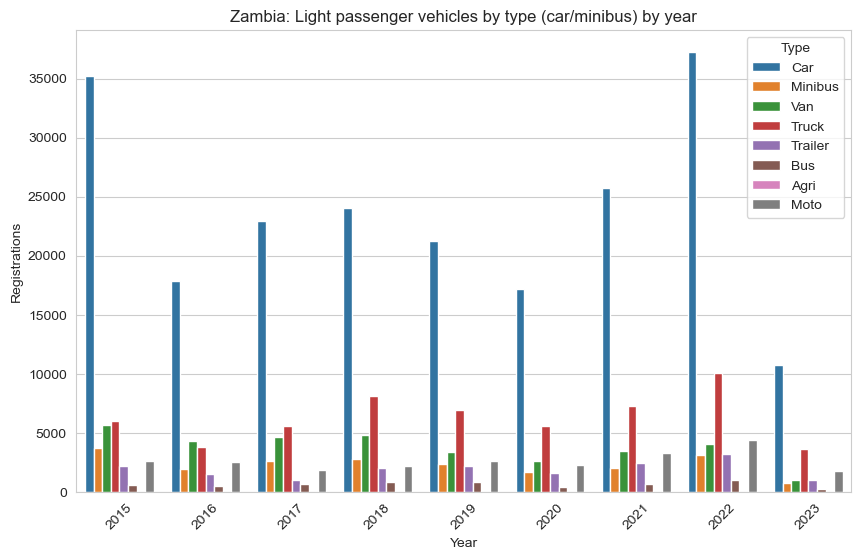

In [51]:
# plot

plot_df = pd.DataFrame(data).transpose()

# Reset the index to create a 'Year' column
plot_df_reset = plot_df.reset_index().rename(columns={'index': 'Year'})

# Reshape the DataFrame for plotting
plot_df_melted = plot_df_reset.melt(id_vars='Year', var_name='Type', value_name='Registrations')

# Ensure 'Year' is numeric
plot_df_melted['Year'] = pd.to_numeric(plot_df_melted['Year'])



# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Registrations', hue='Type', data=plot_df_melted)
plt.title('Zambia: Light passenger vehicles by type (car/minibus) by year')
plt.xlabel('Year')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.show()

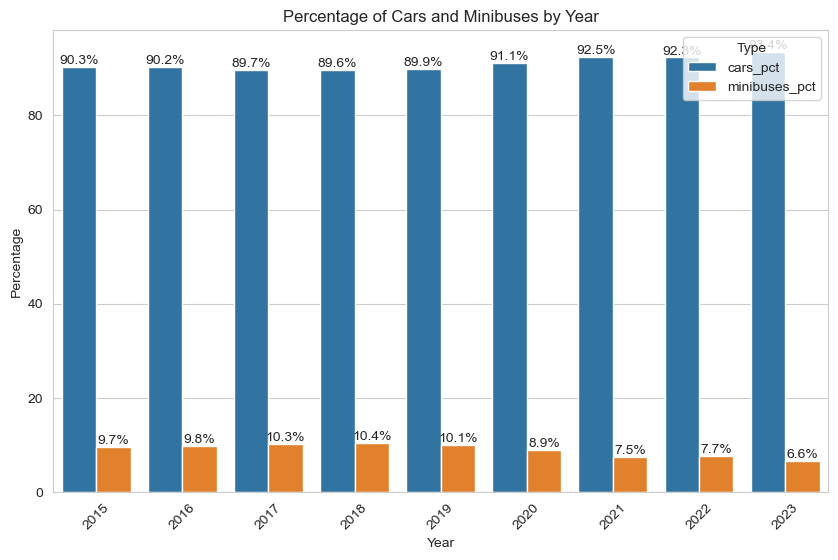

In [52]:
# Create a DataFrame
perc_df = pd.DataFrame(data).transpose()

# Reset the index to create a 'Year' column
perc_df_reset = perc_df.reset_index().rename(columns={'index': 'Year'})

# Calculate total vehicles for each year
perc_df_reset['Total'] = perc_df_reset['Car'] + perc_df_reset['Minibus']

# Calculate percentages
perc_df_reset['cars_pct'] = round((perc_df_reset['Car'] / perc_df_reset['Total']) * 100, 1)
perc_df_reset['minibuses_pct'] = round((perc_df_reset['Minibus'] / perc_df_reset['Total']) * 100, 1)

# Reshape for plotting
perc_df_melted = perc_df_reset.melt(id_vars='Year', value_vars=['cars_pct', 'minibuses_pct'], var_name='Type', value_name='Percentage')

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='Percentage', hue='Type', data=perc_df_melted)
plt.title('Percentage of Cars and Minibuses by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

In [ ]:
perc_df_melted[(perc_df_melted['Type'] == 'minibuses_pct') & (perc_df_melted['Year'] < 2022)].Percentage.mean()